## Observations and Insights 

In [2]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset with a join on Mouse ID
mouse_study_joined_results_df = pd.DataFrame.merge(mouse_metadata, study_results, on="Mouse ID",how="left")


# Display the data table for preview
mouse_study_joined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
unique_mice = len(mouse_study_joined_results_df["Mouse ID"].unique())
#unique_mice


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mice_ID = mouse_study_joined_results_df.loc[mouse_study_joined_results_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID']
duplicated_mice_ID


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicated_mouse_ID_df = mouse_study_joined_results_df[mouse_study_joined_results_df['Mouse ID'] == 'g989']
Duplicated_mouse_ID_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_mouse_study_df = mouse_study_joined_results_df[mouse_study_joined_results_df['Mouse ID'] != 'g989']
cleaned_mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mice2 = len(cleaned_mouse_study_df["Mouse ID"].unique())
unique_mice2

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

tumor_mean = cleaned_mouse_study_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = cleaned_mouse_study_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_var = cleaned_mouse_study_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_std = cleaned_mouse_study_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_sem = cleaned_mouse_study_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
 
# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({'Tumor Mean': tumor_mean, 
                           'Tumor Median':tumor_median, 
                           'Variance': tumor_var,
                          'Standard Deviation': tumor_std,
                          'SEM': tumor_sem})
summary_df


,Tumor Mean,Tumor Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregated_df = cleaned_mouse_study_df.agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
summary_aggregated_df.head()

,Tumor Volume (mm3)
mean,50.435293
median,48.933454
var,79.462907
std,8.914197
sem,0.205591


## Bar and Pie Charts

<IPython.core.display.Javascript object>


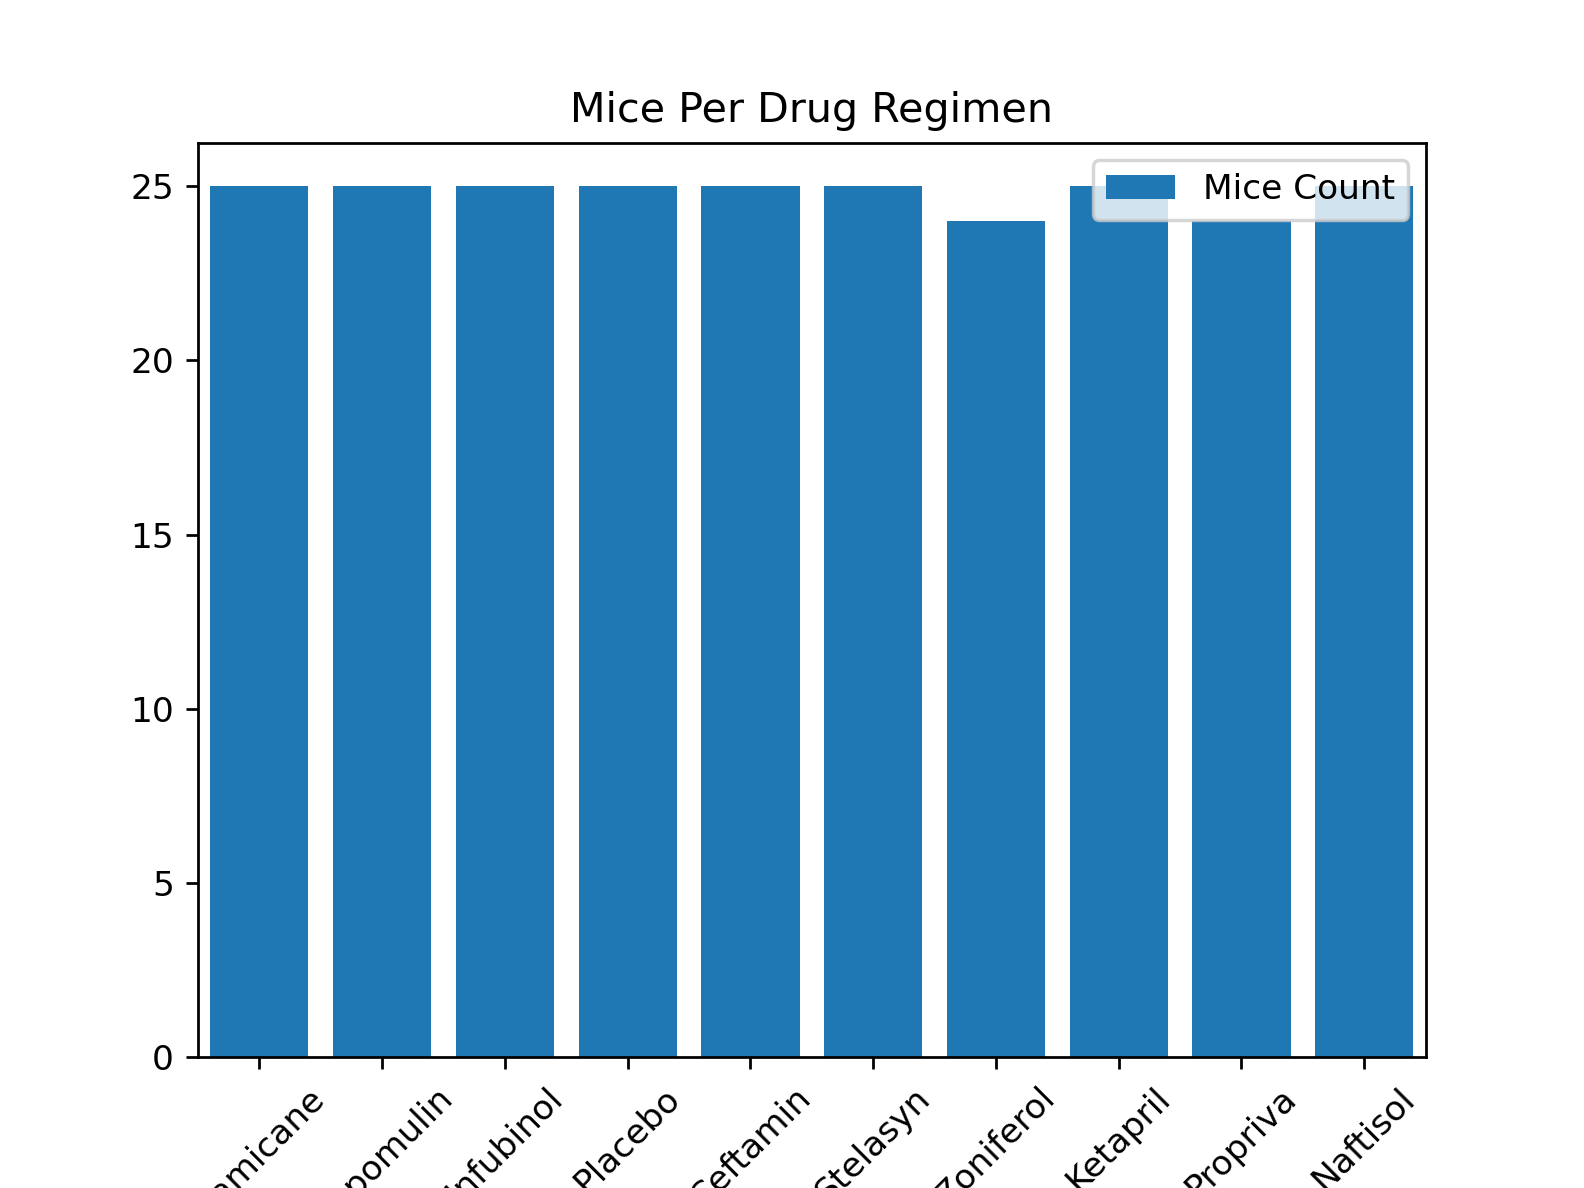

AxesSubplot(0.125,0.11;0.775x0.77)


In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
y_axis_size = unique_mice2
x_axis_labels = cleaned_mouse_study_df['Drug Regimen'].unique()

cleaned_mouse_study_groupby_df = cleaned_mouse_study_df.groupby(['Drug Regimen'])
#test = cleaned_mouse_study_groupby_df['Mouse ID'].unique()
#print(test)


mice_per_regimen = [len(regimen) for regimen in cleaned_mouse_study_groupby_df["Mouse ID"].unique()]
mice_per_regimen

bar_graph_df = pd.DataFrame({'Drug Regimen': x_axis_labels , 'Mice Count': mice_per_regimen})
plot_pandas = bar_graph_df.plot.bar(x='Drug Regimen', y='Mice Count', rot=45, title="Mice Per Drug Regimen")
print(plot_pandas)


In [21]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x = x_axis_labels
y = mice_per_regimen
plot_pyplot = plt.bar(x, y)
plt.title("Mice Per Drug Regimen")


Text(0.5, 1.0, 'Mice Per Drug Regimen')

In [22]:
plt.show()

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
female_mice_df = cleaned_mouse_study_df.loc[cleaned_mouse_study_df['Sex'] == "Female"] 
female_mice_df.head()
num_female_mice = len(female_mice_df['Mouse ID'].unique())
print(f'Number of female mice = {num_female_mice}')

male_mice_df = cleaned_mouse_study_df.loc[cleaned_mouse_study_df['Sex'] == "Male"] 
male_mice_df.head()
num_male_mice = len(male_mice_df['Mouse ID'].unique())
print(f'Number of male mice = {num_male_mice}')

female_vs_male_df = pd.DataFrame({
    "Number Per Sex": {
    "Female": num_female_mice,
    "Male": num_male_mice
    }
})

female_vs_male_df['Total'] = num_male_mice + num_female_mice
total = num_male_mice + num_female_mice
print(f'Total # of mice: {total}')

female_vs_male_df.head()
#female_vs_male_df.plot.pie(y='total', figsize=(5,5))

Number of female mice = 123
Number of male mice = 125
Total # of mice: 248


,Number Per Sex,Total
Female,123,248
Male,125,248


<IPython.core.display.Javascript object>


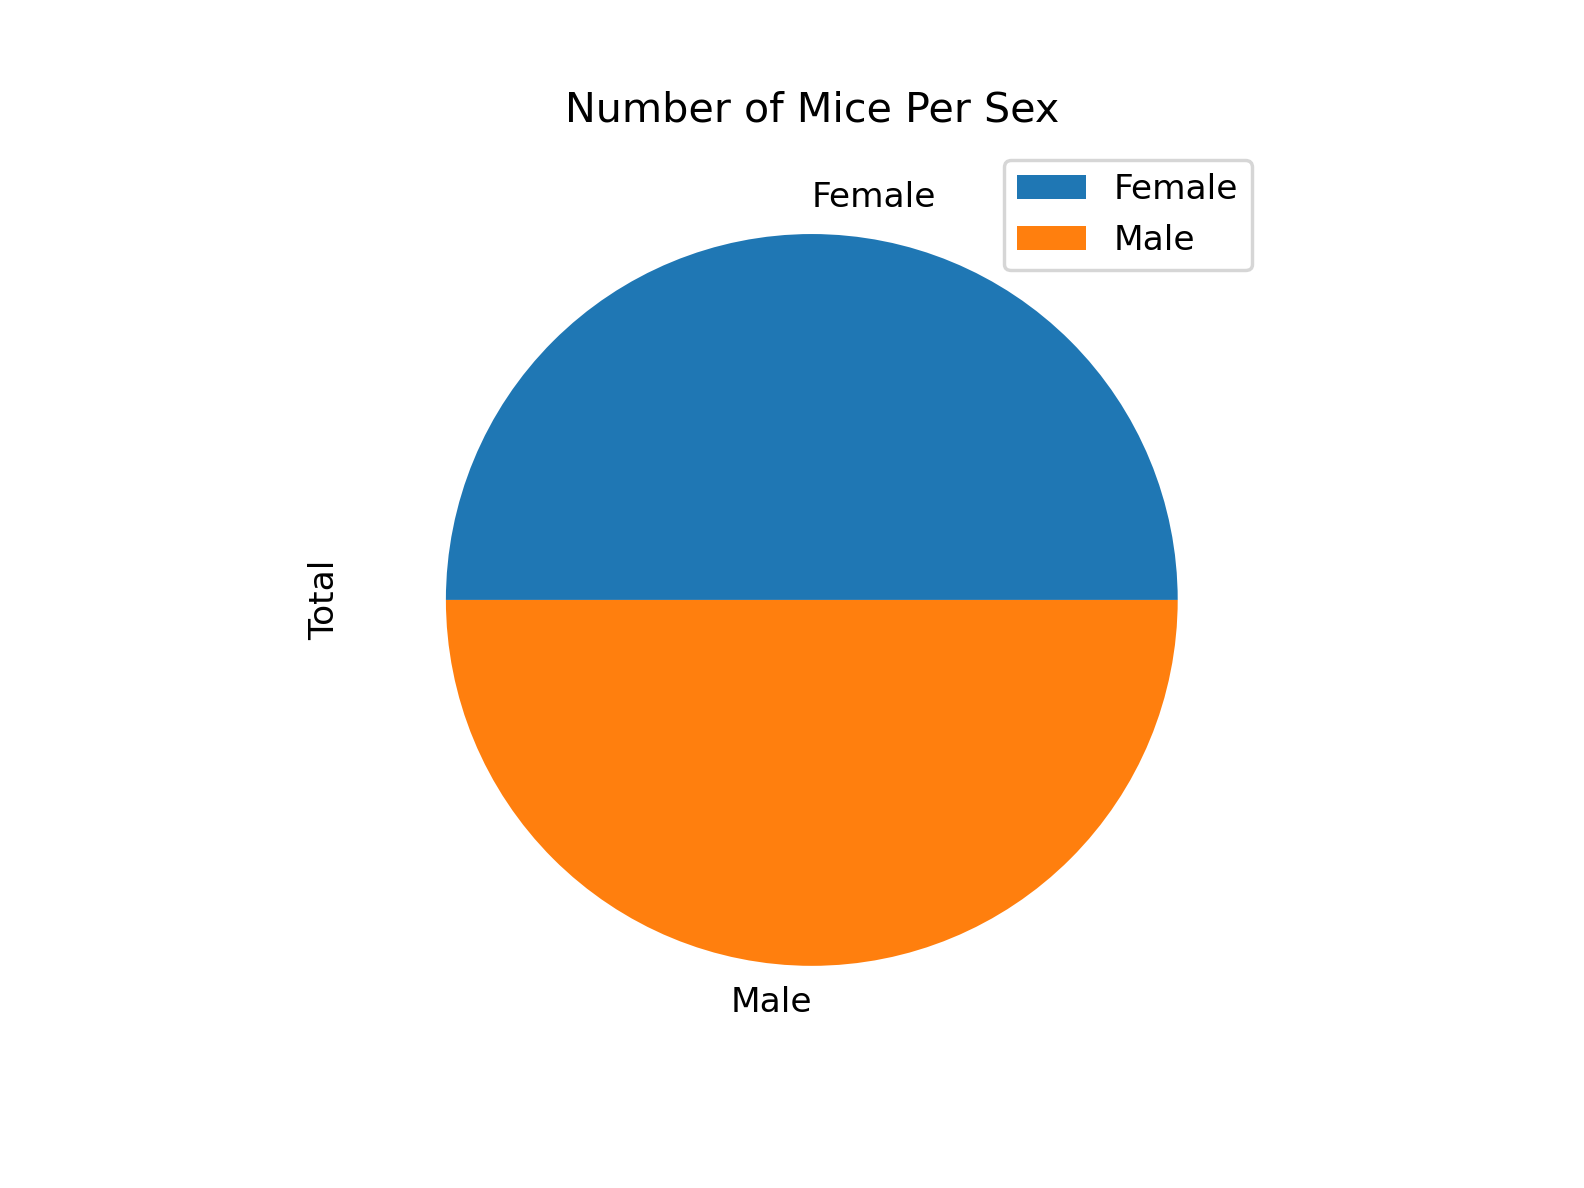

AxesSubplot(0.22375,0.11;0.5775x0.77)


In [71]:
plot_pandas = female_vs_male_df.plot(kind='pie',y='Total', title='Number of Mice Per Sex')
print(plot_pandas)

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = female_vs_male_df['Number Per Sex']
labels = ['male','female']
colors = ['blue','orange']
sizes
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()


## Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Start by getting the last (greatest) timepoint for each mouse
last_greatest_timepoint_df = cleaned_mouse_study_df.loc[cleaned_mouse_study_df.groupby("Mouse ID").Timepoint.idxmax(),:]
#print(last_greatest_timepoint_df.head())

#for drug in drug_regimens_list:
last_greatest_timepoint_df.loc[last_greatest_timepoint_df['Drug Regimen'] == drug_regimens_list[0]].reset_index(drop=True)
#print(last_greatest_timepoint_df.head())


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_timepoint_df = pd.DataFrame.merge(cleaned_mouse_study_df,last_greatest_timepoint_df, on="Mouse ID",how="left")
merged_timepoint_df.head()

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,Ramicane,Male,21,16,45,22.050126,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,Ramicane,Male,21,16,45,22.050126,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,Ramicane,Male,21,16,45,22.050126,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,Ramicane,Male,21,16,45,22.050126,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,Ramicane,Male,21,16,45,22.050126,1


In [83]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_df = pd.DataFrame()
for drug in drug_regimens_list:
    tumor_volume_df = cleaned_mouse_study_df.loc[cleaned_mouse_study_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    #tumor_df[drug] = tumor_volume_df.reset_index(drop=True)
    print(tumor_volume_df)
    # Locate the rows which contain mice on each drug and get the tumor volumes
  
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


10      45.000000
11      43.878496
12      37.614948
13      38.177232
14      36.866876
          ...    
440     47.685963
1452    45.000000
1453    45.597064
1454    46.059608
1455    46.539206
Name: Tumor Volume (mm3), Length: 230, dtype: float64
0      45.000000
1      38.825898
2      35.014271
3      34.223992
4      32.997729
         ...    
449    43.166373
450    45.000000
451    45.877545
452    46.378092
453    44.183451
Name: Tumor Volume (mm3), Length: 228, dtype: float64
454     45.000000
455     48.508468
456     51.852437
457     52.777870
458     55.173336
          ...    
1868    54.316407
1869    56.286750
1870    58.628399
1871    60.053740
1872    62.754451
Name: Tumor Volume (mm3), Length: 178, dtype: float64
484     45.000000
485     46.795257
486     47.371343
487     49.734404
488     50.513437
          ...    
1851    57.173538
1852    59.033275
1853    61.153140
1854    63.469549
1855    64.729837
Name: Tumor Volume (mm3), Length: 178, dtype: float64


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = tumor_volume_data

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
